# Anomaly Detection  
**NAME:** MD RAZEENUDDIN MEHDI (CSE)
**COLLEGE** RAM KRISHNA MAHATO GOVERNMENT ENGINEERING COLLEGE


## Generating a Dummy Set  

First we will generate a dummy data set which consists of two coloumns:  

- Name of the employee  
- Salary (in Rs)

We will use python package **Faker** to generate names and **numpy** to generate the salaries

In [7]:
conda install -c conda-forge faker 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - faker


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    faker-4.1.1                |             py_0         803 KB  conda-forge
    text-unidecode-1.3         |             py_0          68 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         871 KB

The following NEW packages will be INSTALLED:

  faker              conda-forge/noarch::faker-4.1.1-py_0
  text-unidecode     conda-forge/noarch::text-unidecode-1.3-py_0



faker-4.1.1          | 803 KB    | ##################################### | 100% 
text-unidecode-1.3   | 68 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Not

## Completed Installing faker package

In [ ]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To show the plots in Jupyter Notebook
%matplotlib inline
# Using a predefined style set
plt.style.use('ggplot

In [29]:
#Importing Faker package
from faker import Faker

#To generate names of Indian employees
fake = Faker('en_IN')

# To ensure the results are reproducible
Faker.seed()

#List to which the dummy names will get appended to
name_list = []

fake = Faker('en_IN')

# Generating 200 employee names 
for itr in range(200):
  name_list.append(fake.name())

# Verify if 200 names were generated
len(name_list)

200

In [30]:
#for reproducible results

np.random.seed(7)
salaries = []

#Generating the random salaries and appending it to the list salaries
for itr in range(200):
    salary = np.random.randint(30000,80000)
    salaries.append(salary)

# Checking if 200 salaries were generated 
len(salaries)

200

In [83]:
# Creating a pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': name_list,
     'Salary (in Rs)': salaries
    })

# Printing a section of the DataFrame
salary_df.head()

,Person,Salary (in Rs)
0,"पुष्कर, यश",79689
1,"कृष्णन, विद्या",40742
2,मोहिनी महाजन,68467
3,मोहिनी भारत,30919
4,अदिती दोषी,43927


## Manually Changing the data  

Now we will change salaries of 5 entries to create anomaly. In actuality it may occur due to some **software bugs** while recording the data.



In [84]:
salary_df.at[10, 'Salary (in Rs)'] = 2
salary_df.at[35, 'Salary (in Rs)'] = 5000
salary_df.at[115, 'Salary (in Rs)'] = 10000
salary_df.at[135, 'Salary (in Rs)'] = 90000
salary_df.at[185, 'Salary (in Rs)'] = 85000

## Outlier Detection  
Outlier is a piece of data that deviates significantly from the other data points and the process of detecting this outliers is outlier detection. We have already manipulated our data to create some ouliers

## Novelty Detection

A novel data is a new data that we added to the data sets that deviates from the other data points. Novelty detection is a statistical method used to determine new or unknown data and determining if these new data are inlier or outlier.

**Now we will add 2 new data points to the pre-existing data set**

In [85]:
name2_list = []

#Generating 2 names
for itr in range(2):
    name2_list.append(fake.name())

salary_list = [13000, 195000]

#Creating the new data frame

new_df = pd.DataFrame(
    {'Person': name2_list,
     'Salary (in Rs)': salary_list
    })
new_df

,Person,Salary (in Rs)
0,आद्या लोकनाट्यों,13000
1,रजनी शिरोळे,195000


In [86]:
#Appending it to the main data frame 
#Mainting Continuous indexing


salary_df = salary_df.append(new_df, ignore_index = True) 
salary_df

,Person,Salary (in Rs)
0,"पुष्कर, यश",79689
1,"कृष्णन, विद्या",40742
2,मोहिनी महाजन,68467
3,मोहिनी भारत,30919
4,अदिती दोषी,43927
...,...,...
197,अनाया लाल,69167
198,"महादेव, रचना",74370
199,अमायरा काले,65392
200,आद्या लोकनाट्यों,13000


## Clustering approach for anomaly detection  
We are going to use K-means clustering to cluster the data which further uses Euclidean distance internally

In [87]:
# Converting the salary values to a numpy array
salary_raw = salary_df['Salary (in Rs)'].values

#for compatibilty with scipy
salary_raw = salary_raw.astype('float64')

In [88]:
#importing the kmeans module
from scipy import cluster
from scipy.cluster.vq import kmeans

# Supplying the data and the number of clusters to kmeans()
codebook, distortion = kmeans(salary_raw, 4)
# we fed the salary and also the number of clusters to which we want to group the data points

## Assigning the groups of the data points

In [89]:
# We call the vq() method it takes data points and centroids are generated by kmeans clustering algorithm

groups, cdist = cluster.vq.vq(salary_raw, codebook)

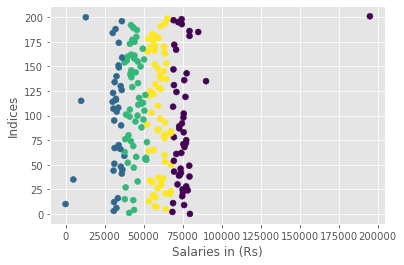

In [90]:
#Plotting 

plt.scatter(salary_raw, np.arange(0,202), c=groups)
plt.xlabel('Salaries in (Rs)')
plt.ylabel('Indices')
plt.show()

Just by visualising the plotting we can clearly point out to the anomalies

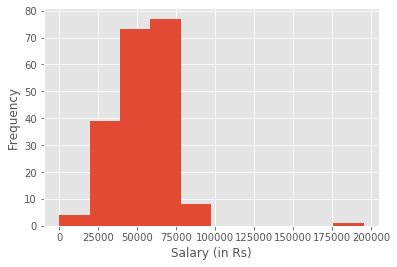

In [91]:
#Plotting a histogram

ax = salary_df['Salary (in Rs)'].plot(kind='hist')
ax.set_xlabel('Salary (in Rs)')
plt.show()